# Massachusetts Education Data
    By: Andrew Ellis

In [76]:
!pip install -U pandasql;
!pip install --upgrade pip

Requirement already up-to-date: pandasql in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: numpy in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: sqlalchemy in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (from pandasql)
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.6/site-packages (from pandas->pandasql)
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.6/site-packages (from pandas->pandasql)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.6/site-packages (from python-dateutil>=2->pandas->pandasql)
Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import DBSCAN
from pandasql import sqldf

from pandas import Series
from numpy.random import randn
#^this is for the error I got during logistic regression

from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

%matplotlib inline

# Notes for capstone:

    - I should use a clustering model at some point. 
    - I am going to use bagging as well.
    - Do I want to do classification? try something like (train['Percent_Change]>0).astype(int)
    -Do I want to compare District PPI with School PPI? If positive, that is good.
    -look at week 6 boosting lesson for Random Forest Regressor and bagging model on Logistic Regression

# EDA Section:
    - Dropping columns.
    - Merging necessary data.
    - Selecting the target variable (It is actually pretty hard).

In [78]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [79]:
df= pd.read_csv('MA_Public_Schools_2017.csv')
df.shape

(1861, 302)

In [80]:
df.head()

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,Phone,Fax,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_3rdGrade_Math_SGP,MCAS_3rdGrade_Math_Incl. in SGP(#),MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Mat

In [81]:
df_nulls = df.isnull().sum()
df_nulls = df_nulls.sort_values(ascending=False)
df_nulls
#Given the amount of nulls in a lot of these columns, I am going to 
#drop any that are over 80% null.

MCAS_3rdGrade_English_SGP                                              1861
MCAS_3rdGrade_Math_SGP                                                 1861
MCAS_3rdGrade_Math_Incl. in SGP(#)                                     1861
MCAS_3rdGrade_English_Incl. in SGP(#)                                  1861
Address 2                                                              1831
MCAS_8thGrade_English_SGP                                              1734
MCAS_8thGrade_Math_SGP                                                 1734
MCAS_7thGrade_Math_SGP                                                 1733
MCAS_7thGrade_English_SGP                                              1733
% MCAS_7thGrade_English_W/F                                            1732
% MCAS_7thGrade_English_P+A                                            1732
MCAS_7thGrade_English_Stud. Incl. #                                    1732
MCAS_7thGrade_English_W/F #                                            1732
% MCAS_7thGr

In [82]:
#I am going to drop the 4 columns that are all nulls (see top of df_nulls)

df = df.drop(['MCAS_3rdGrade_English_SGP', 'MCAS_3rdGrade_Math_SGP', 
              'MCAS_3rdGrade_Math_Incl. in SGP(#)', 'MCAS_3rdGrade_English_Incl. in SGP(#)', 
              'Function', 'Contact Name', 'Fax', 'Phone', 'Address 2', 'Address 1'], axis = 1)

In [83]:
df.shape

(1861, 292)

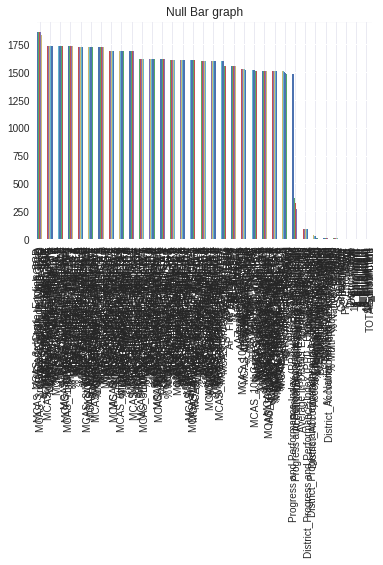

In [84]:
df_nulls.plot(kind='bar', title='Null Bar graph')

In [85]:
df.shape

(1861, 292)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


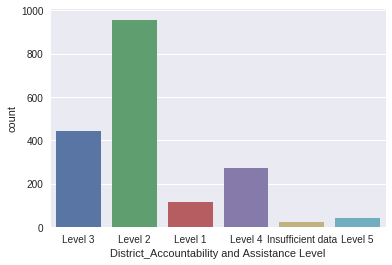

In [86]:
sns.countplot(x=df['District_Accountability and Assistance Level'])
#I am going to focus on schools that achieve a level 1 or above. I believe the state's lack of accountability for 
#a school at level 2 incentivizes schools to misreport those scores.

In [87]:
df.head(3)

,School Code,School Name,School Type,Town,State,Zip,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Math_CPI,MCAS_10thGrade_Math_SGP,MCAS_10thGrade_Math_Incl. in SGP(#),MCAS_3rdGrade_English_P+A #,% MCAS_3rdGrade_

In [88]:
df['State'].nunique()

1

In [89]:
df.drop(['State'], axis = 1, inplace=True)
df.shape

(1861, 291)

Now I want to see if I need to drop any rows

In [90]:
transposed = df.set_index('School Code').T
transposed.head()
transposed.isnull().sum();
#Do I want to drop rows though??

How can we fill certain nulls?

In [91]:
df.select_dtypes(include=object)
#I see that 'Accountability and Assistance description are both here... I might drop the 'description'
#column because I want to make the objects more measurable.
#Accountability levels indicate whether a school is meeting their 'close the gap' expectations
#What does it take to

,School Name,School Type,Town,Grade,District Name,AP_Test Takers,AP_Tests Taken,Accountability and Assistance Level,Accountability and Assistance Description,District_Accountability and Assistance Level,District_Accountability and Assistance Description
0,Abington High,Public School,Abington,"09,10,11,12",Abington,70,123,Level 1,Meeting gap narrowing goals,Level 3,One or more schools in the district classified...
1,Beaver Brook Elementary School,Public School,Abington,"01,02,03,04",Abington,NaN,NaN,Level 3,Among lowest performing 20% of subgroups,Level 3,One or more schools in the district classified...
2,Center Elementary School,Public School,Abington,"PK,K",Abington,NaN,NaN,Insufficient data,NaN,Level 3,One or more schools in the district classified...
3,Frolio Middle School,Public School,Abington,"07,08",Abington,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 3,One or more schools in the district classified...
4,Woodsdale Elementary School,Public School,Abington,"05,06",Abington,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 3,One or more schools in the district classified...
5,Acushnet Elementary School,Public School,Acushnet,"PK,K,01,02,03,04",Acushnet,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...
6,Albert F Ford Middle School,Public School,Acushnet,"05,06,07,08",Acushnet,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...
7,Agawam Early Childhood Center,Public School,Agawam,PK,Agawam,NaN,NaN,Insufficient data,NaN,Level 2,One or more schools in the district classified...
8,Agawam High,Public School,Agawam,"09,10,11,12",Agawam,242,452,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...
9,Agawam Junior High,Public School,Feeding Hills,"07,08",Agawam,NaN,NaN,Level 2,Not meeting gap narrowing goals,Level 2,One or more schools in the district classified...


In [92]:
#df.drop('Accountability and Assistance Description', axis=1, inplace = True)
#Takes care of one object column...
df['AP_Test Takers'].fillna(value=0, inplace=True)

In [93]:
df['AP_Tests Taken'].fillna(value=0, inplace=True)
df['AP_Tests Taken'].dtype

dtype('O')

# Creating High School,  df:

In [94]:
df_high=df.loc[(df['10_Enrollment'] != 0)]
df_high.shape

(395, 291)

# df_high workspace:

### Cleaning:

In [95]:
df_high.head(2)

,School Code,School Name,School Type,Town,Zip,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Math_CPI,MCAS_10thGrade_Math_SGP,MCAS_10thGrade_Math_Incl. in SGP(#),MCAS_3rdGrade_English_P+A #,% MCAS_3rdGrade_Englis

In [96]:
df_high.shape

(395, 291)

In [97]:
school_type_dummies_high = pd.get_dummies(df_high['School Type'])
df_high = pd.concat([df_high, school_type_dummies_high], axis=1)
df_high.shape

(395, 293)

In [98]:
#I am creating an Avg SAT column on the 1600 scale to get a more comprehensive measure
df_high['Avg 1600 SAT'] = df_high['Average SAT_Reading'] + df_high['Average SAT_Math']

In [99]:
df_high.shape

(395, 294)

In [100]:
df_high[['% Graduated', 'Avg 1600 SAT', '% AP_Score 3-5', '% Attending College']].isnull().sum()
#I am going to choose % attending college as my target because this number includes 2-year institutions as well
#as 4 year institutions. More on this is included in the readme.

% Graduated            25
Avg 1600 SAT           66
% AP_Score 3-5         93
% Attending College    54
dtype: int64

In [101]:
#Now that I have chosen my target for evaluating high schools, I will impute the 54 missing values.
#It is OK to impute these values because this only accounts for 13% of the data
df_high['% Attending College'].fillna((df_high['% Attending College'].mean()), inplace=True)

In [102]:
df_high['% Attending College'].isnull().sum()

0

In [103]:
df_high.head(2)

,School Code,School Name,School Type,Town,Zip,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Math_CPI,MCAS_10thGrade_Math_SGP,MCAS_10thGrade_Math_Incl. in SGP(#),MCAS_3rdGrade_English_P+A #,% MCAS_3rdGrade_Englis

### Dropping columns with descriptive values and lots of missing information:

In [104]:
#I am dropping these columns to avoid multicolinearity or redundancy
df_high.drop(['Accountability and Assistance Level', 'Accountability and Assistance Description', 
              'District_Accountability and Assistance Description', 
              'District_Accountability and Assistance Level', 'AP_Test Takers',
             'AP_Tests Taken', 'Progress and Performance Index (PPI) - High Needs Students', 
             'District_Progress and Performance Index (PPI) - All Students', 
             'District_Progress and Performance Index (PPI) - High Needs Students'], axis=1, inplace=True)

In [105]:
#Dropping enrollment columns:
df_high.drop(['PK_Enrollment', 'K_Enrollment', '1_Enrollment', '2_Enrollment', '3_Enrollment', 
              '4_Enrollment', '5_Enrollment', '6_Enrollment', '7_Enrollment', 
              '8_Enrollment'], axis=1, inplace=True)

In [106]:
df_high.dropna(thresh=330, axis=1, inplace=True)

In [107]:
df_high.isnull().sum()

School Code                                             0
School Name                                             0
School Type                                             0
Town                                                    0
Zip                                                     0
Grade                                                   0
District Name                                           0
District Code                                           0
9_Enrollment                                            0
10_Enrollment                                           0
11_Enrollment                                           0
12_Enrollment                                           0
SP_Enrollment                                           0
TOTAL_Enrollment                                        0
First Language Not English                              0
% First Language Not English                            0
English Language Learner                                0
% English Lang

In [108]:
#Clearly there are a lot of columns that need to have imputed values so I am going to build a function
#that does this for me.
def common_nulls_high(df):
    for col in df.columns:
        if df[col].isnull().sum() == 11:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 45:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 25:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 30:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 54:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 41:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 44:
            df.drop([col], axis=1, inplace=True)
        elif df[col].isnull().sum() == 56:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 62:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 42:
            df.drop([col], axis=1, inplace=True)
        elif df[col].isnull().sum() == 43:
            df[col].fillna((df[col].mean()), inplace=True)
        elif df[col].isnull().sum() == 58:
            df[col].fillna((df[col].mean()), inplace=True)
    return df

In [109]:
common_nulls_high(df_high);

In [110]:
df_high.dtypes

School Code                                              int64
School Name                                             object
School Type                                             object
Town                                                    object
Zip                                                      int64
Grade                                                   object
District Name                                           object
District Code                                            int64
9_Enrollment                                             int64
10_Enrollment                                            int64
11_Enrollment                                            int64
12_Enrollment                                            int64
SP_Enrollment                                            int64
TOTAL_Enrollment                                         int64
First Language Not English                             float64
% First Language Not English                           

### Model experimentation:

In [130]:
#One thing that is different here is that '% Attending College' is our 
features_high = df_high.drop(['% Attending College', 'School Name', 'Town', 'Grade', 
                              'District Name', 'School Type', '% Private Two-Year', '% Private Four-Year',
                              '% UMass', 'Attending Coll./Univ. (#)', 'First Language Not English', 
                              'English Language Learner', 'Students With Disabilities', 'Economically Disadvantaged',
                              '% MA Community College', '% MA State University', 'MCAS_10thGrade_English_SGP',
                              'MCAS_10thGrade_English_Incl. in SGP(#)', 'MCAS_10thGrade_Math_Incl. in SGP(#)',
                              'MCAS_10thGrade_Math_SGP', 'High Needs', '% Public Two-Year',
                              '% Public Four-Year', '9_Enrollment', '10_Enrollment',
                              '11_Enrollment', '12_Enrollment', 'Zip',
                              'School Accountability Percentile (1-99)'], axis=1)

X_high = features_high
y_high = df_high['% Attending College']
ss = StandardScaler()
X_high_s = ss.fit_transform(X_high)

In [131]:
optimal_lasso_high = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso_high.fit(X_high_s, y_high)

................................................................................................................................................................................................................................................................................................................................................................................................................................................................../opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
...................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=1)

In [132]:
lasso_high=Lasso(alpha=optimal_lasso_high.alpha_)

lasso_scores_high = cross_val_score(lasso_high, X_high_s, y_high, cv=10)

print(lasso_scores_high)
print(np.mean(lasso_scores_high))

[ 0.40175079  0.46583256  0.56308414  0.64108129  0.33254764  0.35223078
  0.40909501  0.58369979  0.37204797 -0.11769477]
0.40036751928570596


In [133]:
Lasso_high_coefs = pd.DataFrame({
        'coef':optimal_lasso_high.coef_,
        'variable':features_high.columns,
        
    })
Lasso_high_coefs.sort_values('coef', ascending=False, inplace=True)
Lasso_high_coefs.head(20)

,coef,variable
38,7.399949,SAT_Tests Taken
6,3.287352,% Students With Disabilities
17,2.780085,% Females
19,1.697682,Average Class Size
40,1.571186,Charter School
9,1.245051,% African American
10,0.837241,% Asian
31,0.488722,% Graduated
22,0.401055,Average Salary
28,0.000000,Total Pupil FTEs


In [122]:
Lasso_high_coefs.tail(20)

,coef,variable
14,-0.000000e+00,"% Native Hawaiian, Pacific Islander"
11,0.000000e+00,% Hispanic
8,-0.000000e+00,% Economically Disadvantaged
5,-0.000000e+00,% English Language Learner
4,0.000000e+00,% First Language Not English
3,0.000000e+00,TOTAL_Enrollment
2,0.000000e+00,SP_Enrollment
34,-0.000000e+00,% GED
42,-6.116064e-16,Public School
36,-5.566415e-02,% Permanently Excluded


## Since I have a continuous target variable, I am going to use a random forest regression model

In [115]:
features_rf_high = df_high.drop(['% Attending College', 'School Name', 'Town', 'Grade', 
                              'District Name', 'School Type', '% Private Two-Year', '% Private Four-Year',
                              '% UMass', 'Attending Coll./Univ. (#)', 'First Language Not English', 
                              'English Language Learner', 'Students With Disabilities', 'Economically Disadvantaged',
                              '% MA Community College', '% MA State University', 'MCAS_10thGrade_English_SGP',
                              'MCAS_10thGrade_English_Incl. in SGP(#)', 'MCAS_10thGrade_Math_Incl. in SGP(#)',
                              'MCAS_10thGrade_Math_SGP', 'High Needs', '% Public Two-Year',
                                 '9_Enrollment', '10_Enrollment', '11_Enrollment', '12_Enrollment', 
                                 '% Public Four-Year', '% Females', '% Males', 'Zip',
                                 ], axis=1)

X_high_rf = features_rf_high
y_high_rf = df_high['% Attending College']

X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high_rf, y_high_rf.values, test_size=0.33, random_state=42)

ss = StandardScaler()
X_rf_high_s = ss.fit_transform(X_train_high)

In [116]:
rfr = RandomForestRegressor(random_state=42, criterion='mse')
rfr_params = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [None, 1, 2, 3],
    'max_features': ['auto', 'log2']
}
gs_rfr = GridSearchCV(rfr, rfr_params)
gs_rfr.fit(X_train_high, y_train_high)
print(gs_rfr.best_score_)
print(gs_rfr.best_params_)

0.5465082354973261
{'max_depth': None, 'max_features': 'log2', 'n_estimators': 15}


                                                    importance
feature                                                       
% Students With Disabilities                             0.251
School Accountability Percentile (1-99)                  0.207
SAT_Tests Taken                                          0.058
# in Cohort                                              0.043
% Economically Disadvantaged                             0.040
% High Needs                                             0.037
% Dropped Out                                            0.035
School Code                                              0.026
Total # of Classes                                       0.025
Total Pupil FTEs                                         0.024
TOTAL_Enrollment                                         0.022
% Hispanic                                               0.019
% Asian                                                  0.016
% GED                                                  

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


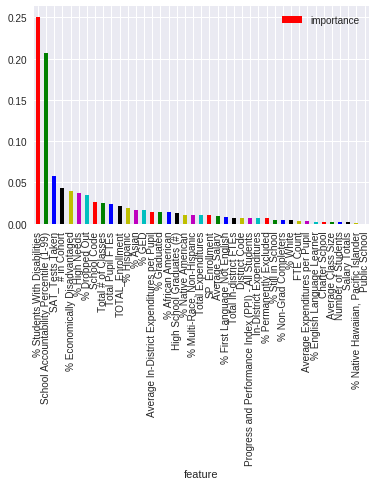

In [117]:
rfr.fit(X_rf_high_s, y_train_high)
high_importances = rfr.feature_importances_
indices = np.argsort(high_importances)[::-1]

high_importances_df = pd.DataFrame({'feature':X_high_rf.columns,'importance':np.round(high_importances,3)})
high_importances_df = high_importances_df.sort_values('importance',ascending=False).set_index('feature')
print(high_importances_df)
my_colors= 'rgbkymc'
high_importances_df.plot(kind = 'bar', colors=my_colors)

### Linear Regression on High Schools:

In [118]:
lr = LinearRegression()
lr.fit(features_rf_high, y_high_rf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
high_model=lr.fit(features_rf_high, y_high_rf)
linear_coefs = high_model.coef_
score_high_schools = high_model.score(features_rf_high, y_high_rf)
score_high_schools
linear_coefs


Linear_high_coefs = pd.DataFrame({
        'coef':high_model.coef_,
        'variable':features_rf_high.columns,
        
    })
Linear_high_coefs.sort_values('coef', ascending=False, inplace=True)
Linear_high_coefs

,coef,variable
9,1.224327e+01,% African American
10,1.218793e+01,% Asian
11,1.216247e+01,% Hispanic
12,1.200998e+01,% White
15,1.191260e+01,"% Multi-Race, Non-Hispanic"
14,1.118857e+01,"% Native Hawaiian, Pacific Islander"
13,1.001439e+01,% Native American
32,9.446082e+00,% GED
29,9.243580e+00,% Graduated
31,9.181649e+00,% Non-Grad Completers


In [120]:
df_high.to_csv('Mass_Educ_data_high_schools.csv', index=False)

# Junk...

In [121]:
#df['AP_Tests Taken'] = df['AP_Tests Taken'].str.replace(',', '')
#df['AP_Tests Taken'] = df['AP_Tests Taken'].replace(nan, '')
#df['AP_Tests Taken'].astype(int)